# Line of Electrons going through a dipole 

first, let's:
## Generate the path

In [20]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import xobjects as xo
import xtrack as xt

In [21]:
# Old code data:
'''
quad0 = Quadrupole(
    x_min=-2.4610+magsetdelt["quad0"][0], x_max=2.4610+magsetdelt["quad0"][0], # cm
    y_min=-2.4610+magsetdelt["quad0"][1], y_max=2.4610+magsetdelt["quad0"][1], # cm
    z_min=367.33336, z_max=464.6664, # cm
    gradient=magsetvals[MagnetsSettings][0] # kG/m
)


quad1 = Quadrupole(
    x_min=-2.4610+magsetdelt["quad1"][0], x_max=2.4610+magsetdelt["quad1"][0], # cm
    y_min=-2.4610+magsetdelt["quad1"][1], y_max=2.4610+magsetdelt["quad1"][1], # cm
    z_min=590.3336, z_max=687.6664, # cm
    # gradient=+28.55 if(MagnetsSettings==502) else +46.42 # kG/m
    gradient=magsetvals[MagnetsSettings][1] # kG/m
)
quad2 = Quadrupole(
    x_min=-2.4610+magsetdelt["quad2"][0], x_max=2.4610+magsetdelt["quad2"][0], # cm
    y_min=-2.4610+magsetdelt["quad2"][1], y_max=2.4610+magsetdelt["quad2"][1], # cm
    z_min=812.3336, z_max=909.6664, # cm
    gradient=magsetvals[MagnetsSettings][2] # kG/m
)
xcorr = Dipole(
    x_min=-10.795+magsetdelt["xcorr"][0], x_max=+10.795+magsetdelt["xcorr"][0], 
    y_min=-4.6990+magsetdelt["xcorr"][1], y_max=+4.6990+magsetdelt["xcorr"][1],
    z_min=987.779, z_max=1011.15,
    B_x=0, B_y=+0.026107, B_z=0  # Tesla
)
dipole = Dipole(
    x_min=-2.2352+magsetdelt["dipole"][0], x_max=2.2352+magsetdelt["dipole"][0],
    y_min=-6.3752+magsetdelt["dipole"][1], y_max=3.1752+magsetdelt["dipole"][1],
    z_min=1260.34, z_max=1351.78,
    B_x=0.219, B_y=0, B_z=0  # Tesla
)
'''

'\nquad0 = Quadrupole(\n    x_min=-2.4610+magsetdelt["quad0"][0], x_max=2.4610+magsetdelt["quad0"][0], # cm\n    y_min=-2.4610+magsetdelt["quad0"][1], y_max=2.4610+magsetdelt["quad0"][1], # cm\n    z_min=367.33336, z_max=464.6664, # cm\n    gradient=magsetvals[MagnetsSettings][0] # kG/m\n)\n\n\nquad1 = Quadrupole(\n    x_min=-2.4610+magsetdelt["quad1"][0], x_max=2.4610+magsetdelt["quad1"][0], # cm\n    y_min=-2.4610+magsetdelt["quad1"][1], y_max=2.4610+magsetdelt["quad1"][1], # cm\n    z_min=590.3336, z_max=687.6664, # cm\n    # gradient=+28.55 if(MagnetsSettings==502) else +46.42 # kG/m\n    gradient=magsetvals[MagnetsSettings][1] # kG/m\n)\nquad2 = Quadrupole(\n    x_min=-2.4610+magsetdelt["quad2"][0], x_max=2.4610+magsetdelt["quad2"][0], # cm\n    y_min=-2.4610+magsetdelt["quad2"][1], y_max=2.4610+magsetdelt["quad2"][1], # cm\n    z_min=812.3336, z_max=909.6664, # cm\n    gradient=magsetvals[MagnetsSettings][2] # kG/m\n)\nxcorr = Dipole(\n    x_min=-10.795+magsetdelt["xcorr"][0], x_

In [ ]:
## Generate a simple line
# Generate beam at z=0

elements_dir = {
    'start_to_quad0': xt.Drift(length=3.67),
    'quad0': xt.Quadrupole(length=4.64-3.67, k1=3),
    'q0toq1': xt.Drift(length=1), # 5cm
    'quad1': xt.Quadrupole(length=0.5, k1s=3),
    'q1toq2': xt.Drift(length=1), # 5cm
    'quad2': xt.Quadrupole(length=0.5, k1=2),
    'q2todipole': xt.Drift(length=0.5), # 5cm
    'dipole': xt.Bend(k0=10, length=0.3), # 20cm, k0=1.0
    'drift_out': xt.Drift(length=0.2), # 20cm
}

sequence = list(elements_dir.keys())

elements = list(elements_dir.values())

line = xt.Line(elements=elements, element_names=sequence)

line.particle_ref = xt.Particles(p0c=10e9, #Energy = 10GeV
                                  q0=-1, #Charge
                                    mass0=xt.ELECTRON_MASS_EV)
line.build_tracker()




In [79]:
tw = line.twiss(
    method='4d',
    init=xt.TwissInit(
        x=0, px = 0, y = 0, py = 0,
    ),
    start='start_to_quad0',
    end='drift_out'
)


AssertionError: Some test particles were lost during twiss! (state [-1], at element [8])

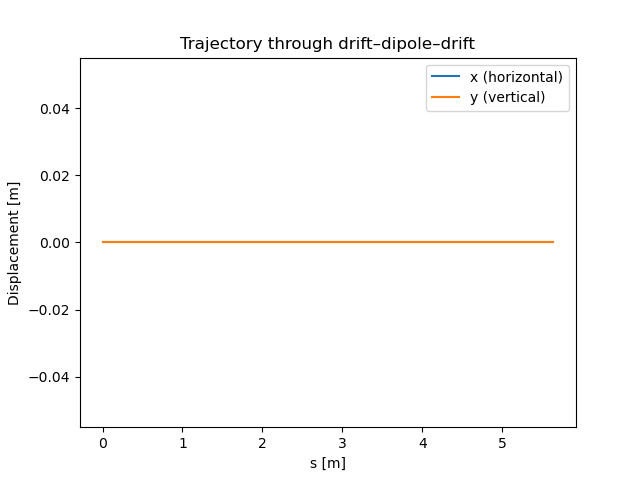

In [78]:

plt.figure()
plt.plot(tw['s'], tw['x'], label="x (horizontal)")
plt.plot(tw['s'], tw['y'], label="y (vertical)")
plt.xlabel("s [m]")
plt.ylabel("Displacement [m]")
plt.legend()
plt.title("Trajectory through drift–dipole–drift")
plt.show()

In [76]:
tab = line.get_table()

# Print only the last column
print(tab.cols)

ColView: s element_type name isthick isreplica parent_name iscollective s_start s_center s_end env_name


In [ ]:
n_part = 200
particles = line.build_particles(
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=5,
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part))
line.track(particles, num_turns=20, turn_by_turn_monitor=True)